In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
from QubitNetwork import QubitNetwork
from qubit_network import load_network_from_file, sgd_optimization, transfer_J_values
import utils
from utils import chop, complex2bigreal, bigreal2complex
from results_analysis_utils import *

pairs = list(itertools.combinations(range(4), 2))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [333]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([
        [np.cos(eta)],
        [np.sin(eta) * np.exp(1j * xi)]
])

net = QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'zz', 'x', 'z']),
    ancillas_state=initial_ancilla,
    system_qubits=[0, 1, 2]
)

factor  = -8.940 / 4 * net.tuple_to_xs_factor(((0, 1), 'zz')).copy()
factor += -4.957 / 4 * net.tuple_to_xs_factor(((0, 2), 'zz'))
factor += -4.957 / 4 * net.tuple_to_xs_factor(((1, 2), 'zz'))
factor += -5.657 / 4 * net.tuple_to_xs_factor(((0, 3), 'zz'))
factor += -5.657 / 4 * net.tuple_to_xs_factor(((1, 3), 'zz'))

factor += 15.060 / 4 * net.tuple_to_xs_factor(((2, 3), 'xx'))

factor += -2.428 / 2 * net.tuple_to_xs_factor((0, 'z'))
factor += -2.428 / 2 * net.tuple_to_xs_factor((1, 'z'))
factor += -4.957 / 2 * net.tuple_to_xs_factor((2, 'z'))
factor += -0.165 / 2 * net.tuple_to_xs_factor((3, 'z'))

factor += -19.08 / 2 * net.tuple_to_xs_factor((2, 'x'))
factor += -4.297 / 2 * net.tuple_to_xs_factor((3, 'x'))

foo = utils.bigreal2complex(factor)
foo = qutip.Qobj(foo, dims=[[2, 2, 2, 2], [2, 2, 2, 2]])
foo = foo.expm()
foo = foo.ptrace([0, 1, 2])
# qutip.tensor(psi, initial_ancilla)
foo

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[  1.98052909e+00-0.15343455j  -2.97374742e-05-0.14470571j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j        ]
 [ -2.97374742e-05-0.14470571j   1.98065237e+00-0.04354642j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j        ]
 [  0.00000000e+00+0.j           0.00000000e+00+0.j
    6.69893185e-01+0.3994908j   -7.66672212e-01-0.26259121j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j        ]
 [  0.00000000e+00+0.j           0.00000000e+00+0.j
   -7.66672212e-01-0.26259121j   9.55838048e-01+0.49737259j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+0

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


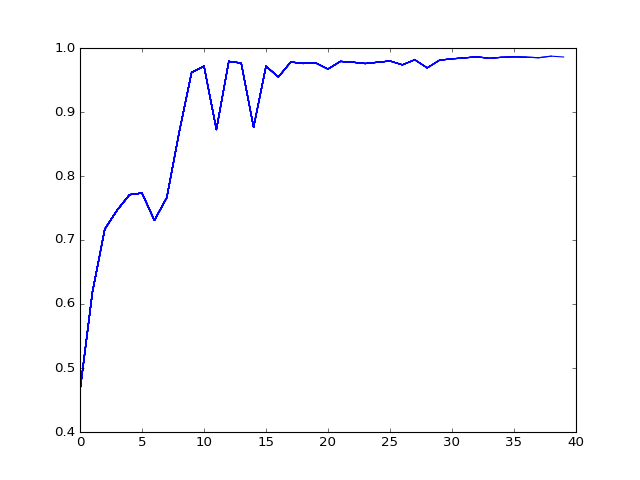

Epoch 0, 0.46448019474013164
Epoch 1, 0.6182397995828635
Epoch 2, 0.7170539984642447
Epoch 3, 0.7467387090011764
Epoch 4, 0.7708566154779449
Epoch 5, 0.7733409578289929
Epoch 6, 0.7306698522297602
Epoch 7, 0.7662656543781001
Epoch 8, 0.8684883382932228
Epoch 9, 0.9617148107289365
Epoch 10, 0.9717119047496808
Epoch 11, 0.8725509249969732
Epoch 12, 0.979111551782913
Epoch 13, 0.9764649622411603
Epoch 14, 0.8761913747171345
Epoch 15, 0.9714684482690372
Epoch 16, 0.9547308473303013
Epoch 17, 0.9781165950658366
Epoch 18, 0.9758245255596565
Epoch 19, 0.9767996406725232
Epoch 20, 0.9670879372580135
Epoch 21, 0.9790707961802123
Epoch 22, 0.977783394171159
Epoch 23, 0.975730169376602
Epoch 24, 0.9777372103805659
Epoch 25, 0.9796843816008333
Epoch 26, 0.9736931674425654
Epoch 27, 0.9816401240705206
Epoch 28, 0.9688998503201162
Epoch 29, 0.981024042014221
Epoch 30, 0.9830859255784601
Epoch 31, 0.9845286213039183
Epoch 32, 0.9862967604852553
Epoch 33, 0.9838418527622588
Epoch 34, 0.985492262917061

In [5]:
# theano.config.optimizer = 'None'
net = QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'yy', 'zz', 'x', 'y', 'z']),
    system_qubits=[0, 1, 2]
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=40,
    batch_size=2,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

## Failing to implement 3-qubit QFT with 1 ancilla

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


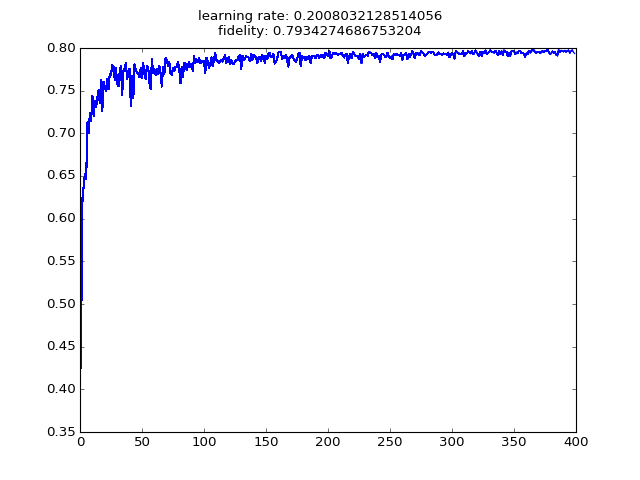

Finished training
Network saved in nets/qft.pickle


In [216]:
net = QubitNetwork(
    num_qubits=4,
    interactions='all',
    system_qubits=[0, 1, 2]
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=400,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
    saveafter_file='nets/qft.pickle'
)

## Success in implementing Hadamard gate with 3 qubits + 1 ancilla

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


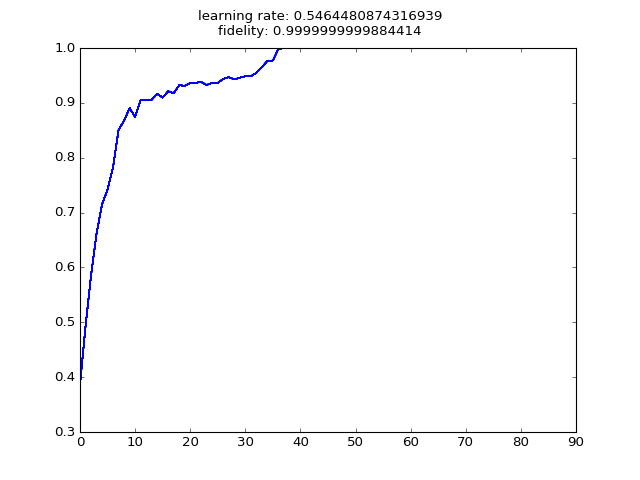

Finished training
Network saved in nets/hadamard.pickle


In [217]:
net = QubitNetwork(
    num_qubits=4,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.hadamard_transform(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
    saveafter_file='nets/hadamard.pickle'
)

In [229]:
Jvalues = net.J.get_value()
vanishing_indices = np.where(np.abs(Jvalues) < 1e-4)[0]
[net.J_index_to_interaction(v) for v in vanishing_indices]

[(3, 'x'),
 (3, 'y'),
 ((0, 3), 'xx'),
 ((0, 3), 'xy'),
 ((0, 3), 'yx'),
 ((0, 3), 'yy'),
 ((0, 3), 'zx'),
 ((0, 3), 'zy'),
 ((1, 3), 'xx'),
 ((1, 3), 'xy'),
 ((1, 3), 'yx'),
 ((1, 3), 'yy'),
 ((1, 3), 'zx'),
 ((1, 3), 'zy'),
 ((2, 3), 'xx'),
 ((2, 3), 'xy'),
 ((2, 3), 'yx'),
 ((2, 3), 'yy'),
 ((2, 3), 'zx'),
 ((2, 3), 'zy')]

### Unitaries that are tensor product of 1-qubit gates are reachable (of course)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


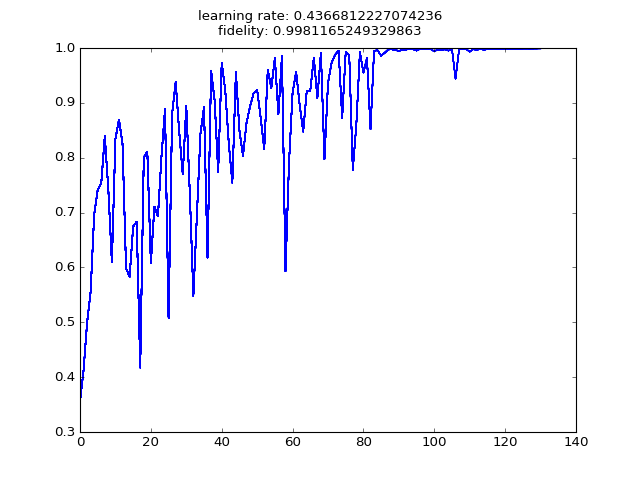

Finished training


In [235]:
rand_U = qutip.tensor([qutip.rand_unitary_haar(2) for _ in range(3)])
net = QubitNetwork(
    num_qubits=4,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=rand_U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
#     saveafter_file='nets/hadamard.pickle'
)

In [245]:
p00 = qutip.ket2dm(qutip.basis(2, 0))
p11 = qutip.ket2dm(qutip.basis(2, 1))
u1 = qutip.rand_unitary_haar(4)
u2 = qutip.rand_unitary_haar(4)
u1.dims = u2.dims = [[2, 2]] * 2
U = qutip.tensor(p00, u1) + qutip.tensor(p11, u2)
U

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[  1.64747131e-01+0.35840994j   8.75158157e-01-0.11061023j
    1.37011999e-01+0.00759236j   1.74056295e-01-0.13091505j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j        ]
 [ -1.75892910e-02-0.22330877j   2.54199327e-01+0.0798988j
   -5.15502976e-01+0.42089219j  -5.88529951e-01-0.2992685j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j        ]
 [ -8.47349244e-01+0.1589137j   -2.18835977e-02-0.30820983j
   -2.48447557e-04-0.02012887j   9.74014321e-02-0.38907741j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j        ]
 [  8.99129644e-02-0.20708902j  -4.30472139e-02+0.23138109j
    7.33222899e-01+0.01598315j  -2.72233762e-01-0.53071369j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


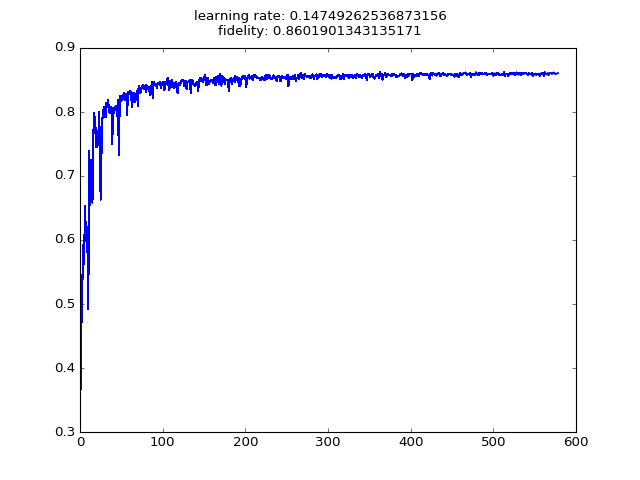

Finished training
Network saved in nets/controlled_stuff.pickle


In [246]:
net = QubitNetwork(
    num_qubits=4,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
    saveafter_file='nets/controlled_stuff.pickle'
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


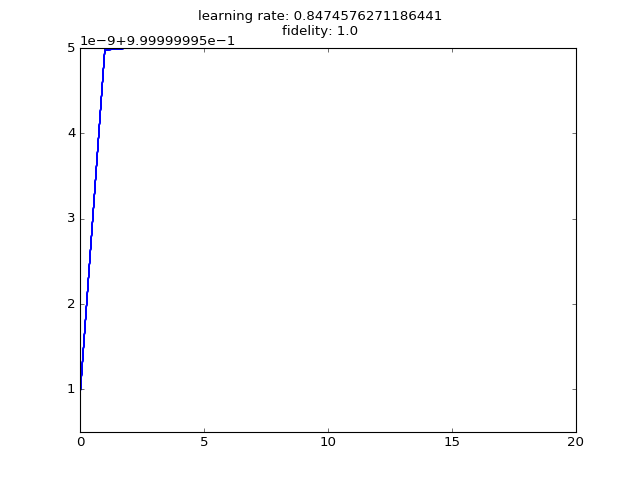

Finished training


In [322]:
U = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.qeye(2))
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions=('all', ['xx', 'zz', 'z']),
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [323]:
gate = qutip.Qobj(net.get_current_gate())
v = net.J.get_value()
display(v)
[net.J_index_to_interaction(i) for i in np.where(np.abs(v) > 1)[0]]

array([  7.36906734e-12,  -7.51491531e-11,  -2.64241191e+00,
        -1.57079633e+00,   9.62644898e-11,   7.01643995e-11,
         2.94343748e-11,  -1.69919502e+00,   3.19241099e-11])

[(2, 'z'), ((0, 1), 'xx'), ((1, 2), 'xx')]

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


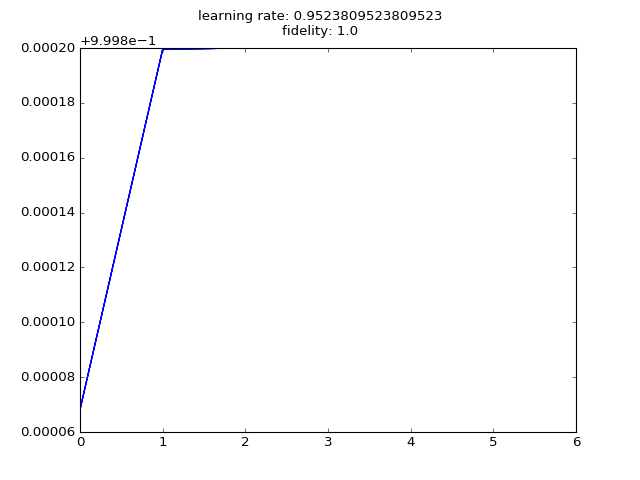

Finished training


In [326]:
U = qutip.tensor(qutip.sigmax(), qutip.sigmax())
net = QubitNetwork(
    num_qubits=2,
    system_qubits=2,
    interactions=('all', ['xx', 'yy', 'zz', 'z']),
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [327]:
net.J.get_value()

array([  2.62497392e-11,   2.20344063e-11,   1.57079633e+00,
        -3.14159265e+00,  -3.15632615e-11])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


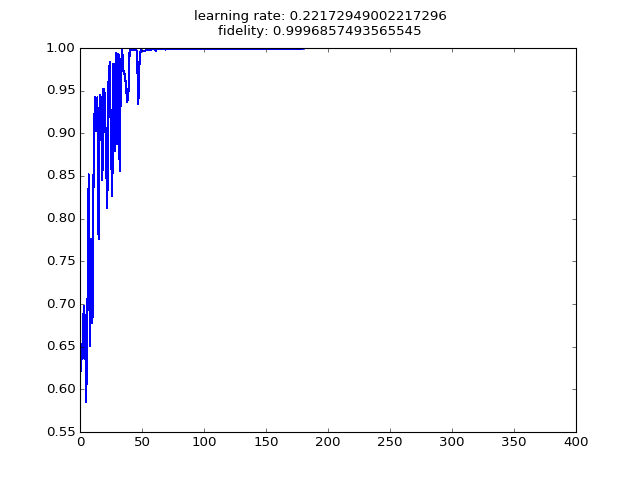

Finished training


In [337]:
p0 = qutip.Qobj([[1, 0], [0, 0]])
p1 = qutip.Qobj([[0, 0], [0, 1]])
i2 = qutip.qeye(2)
u2 = qutip.rand_unitary_haar(2)
u2p = qutip.rand_unitary_haar(2)
U = (qutip.tensor(p0, p0, i2) +
     qutip.tensor(p0, p1, i2) +
     qutip.tensor(p1, p0, i2) +
     qutip.tensor(p1, p1, u2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all',
    ancillae_state=qutip.basis(2, 0)
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


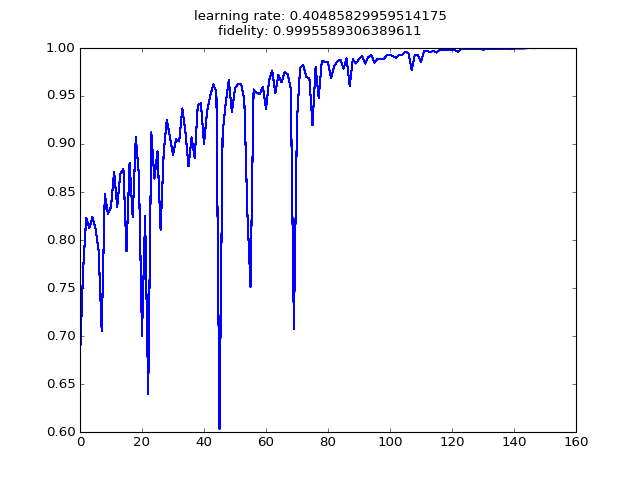

Finished training


In [338]:
p0 = qutip.Qobj([[1, 0], [0, 0]])
p1 = qutip.Qobj([[0, 0], [0, 1]])
i2 = qutip.qeye(2)
u2 = qutip.rand_unitary_haar(2)
u2p = qutip.rand_unitary_haar(2)
U = (qutip.tensor(p0, p0, u2p) +
     qutip.tensor(p0, p1, i2) +
     qutip.tensor(p1, p0, i2) +
     qutip.tensor(p1, p1, u2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all',
    ancillae_state=qutip.basis(2, 0)
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


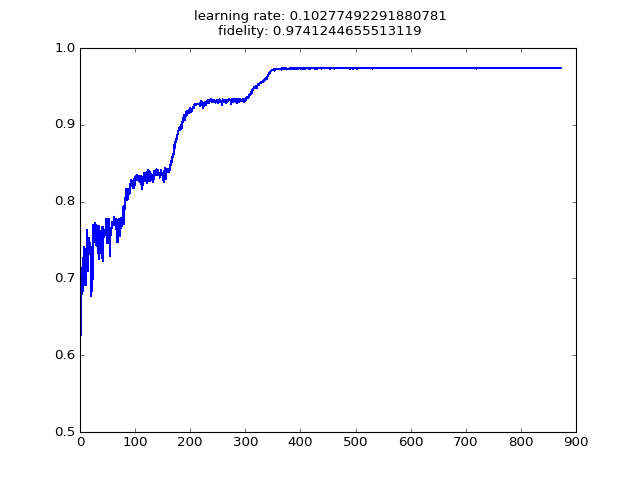

Finished training


In [356]:
p0 = qutip.Qobj([[1, 0], [0, 0]])
p1 = qutip.Qobj([[0, 0], [0, 1]])
i2 = qutip.qeye(2)
u2 = qutip.rand_unitary_haar(2)
u2p = qutip.rand_unitary_haar(2)
u2pp = qutip.rand_unitary_haar(2)
u2ppp = qutip.rand_unitary_haar(2)
U = (qutip.tensor(p0, p0, u2p) +
     qutip.tensor(p0, p1, u2pp) +
     qutip.tensor(p1, p0, u2ppp) +
     qutip.tensor(p1, p1, u2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all',
    ancillae_state=qutip.basis(2, 0)
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


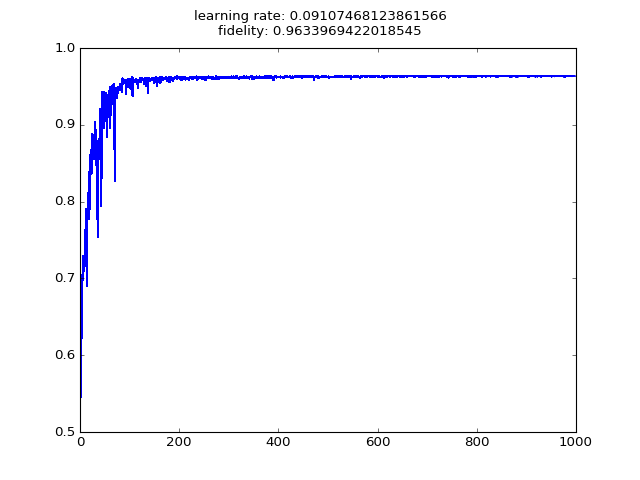

Finished training
Final fidelity: 0.9647386086801542


In [13]:
p0 = qutip.Qobj([[1, 0], [0, 0]])
p1 = qutip.Qobj([[0, 0], [0, 1]])
i2 = qutip.qeye(2)
u2 = qutip.rand_unitary_haar(2)
u2p = qutip.rand_unitary_haar(2)
u2pp = qutip.rand_unitary_haar(2)
u2ppp = qutip.rand_unitary_haar(2)
U = (qutip.tensor(p0, p0, u2p) +
     qutip.tensor(p0, p1, i2) +
     qutip.tensor(p1, p0, i2) +
     qutip.tensor(p1, p1, u2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all',
    ancillae_state=qutip.basis(2, 0)
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [366]:
np.savetxt('matrices/CCrandomrandom_4q1a_all_all.txt', net.get_current_gate(), delimiter=',')

True
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


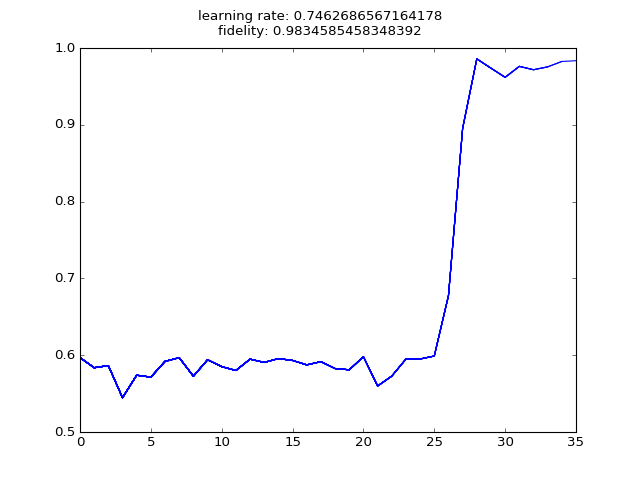

Finished training


In [3]:
interactions = [((0, 1), 'zz'), ((0, 2), 'zz'), ((1, 2), 'zz'), ((1, 3), 'zz'), ((2, 3), 'zz'),
                ((0, 3), 'xx'),
                (0, 'z'), (1, 'z'), (2, 'z'), (3, 'z'),
                (0, 'x'), (1, 'x'), (2, 'x'), (3, 'x'),
                (0, 'y'), (1, 'y'), (2, 'y'), (3, 'y')]
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta)]])
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=initial_ancilla
)
net = sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=5,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

True
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


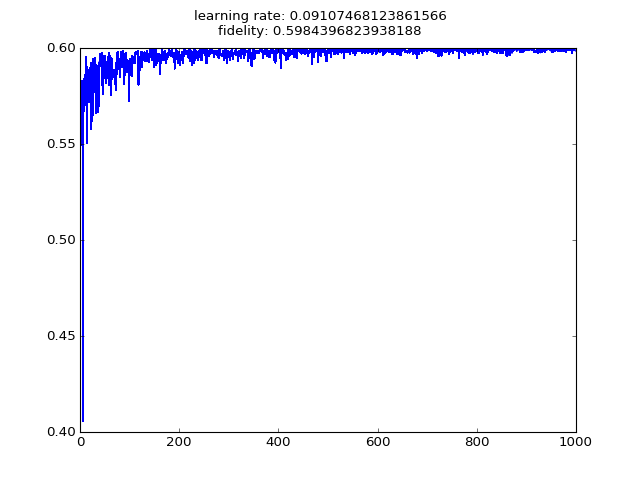

Finished training


In [8]:
interactions = [((0, 1), 'zz'), ((0, 2), 'zz'), ((1, 2), 'zz'), ((1, 3), 'zz'), ((2, 3), 'zz'),
                ((0, 3), 'xx'),
                (0, 'z'), (1, 'z'), (2, 'z'), (3, 'z'),
                (0, 'x'), (1, 'x'), (2, 'x'), (3, 'x')]
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta)]])
net1 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=initial_ancilla
)
net1 = sgd_optimization(
    net=net1,
    learning_rate=1,
    n_epochs=1000,
    batch_size=5,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

True
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


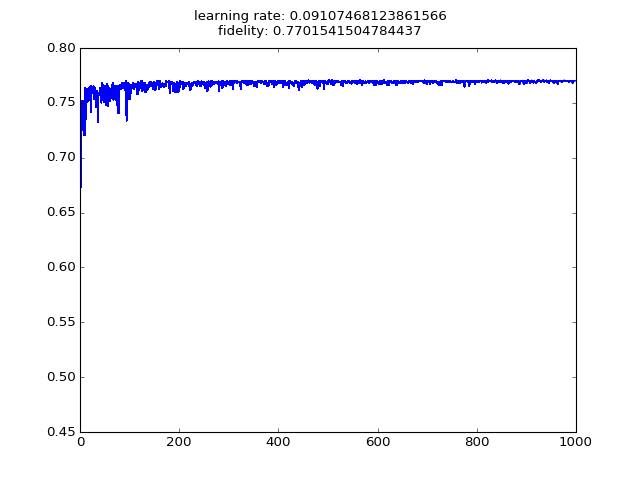

Finished training


In [9]:
interactions = [((0, 1), 'zz'), ((0, 2), 'zz'), ((1, 2), 'zz'), ((1, 3), 'zz'), ((2, 3), 'zz'),
                ((0, 3), 'xx'),
                (0, 'z'), (1, 'z'), (2, 'z'), (3, 'z'),
                (0, 'x'), (1, 'x'), (2, 'x'), (3, 'x')]
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta)]])
net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=initial_ancilla
)
net2 = sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=1000,
    batch_size=5,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

True
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


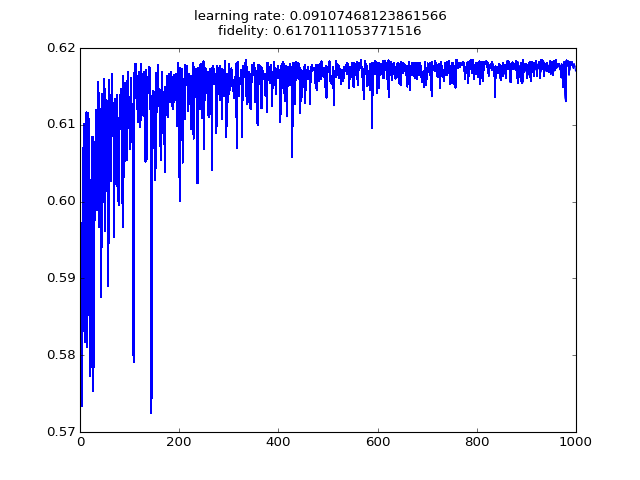

Finished training


In [10]:
interactions = [((0, 1), 'zz'), ((0, 2), 'zz'), ((1, 2), 'zz'), ((1, 3), 'zz'), ((2, 3), 'zz'),
                ((0, 3), 'xx'),
                (0, 'z'), (1, 'z'), (2, 'z'), (3, 'z'),
                (0, 'x'), (1, 'x'), (2, 'x'), (3, 'x')]
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta)]])
net3 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=initial_ancilla
)
net3 = sgd_optimization(
    net=net3,
    learning_rate=1,
    n_epochs=1000,
    batch_size=5,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)